#### nontrivial
Predicate typeclass for expressing that a type is not reduced to a single element. In rings,
this is equivalent to `0 ≠ 1`. In vector spaces, this is equivalent to positive dimension.
```
class nontrivial (α : Type*) : Prop :=
(exists_pair_ne : ∃ (x y : α), x ≠ y)
```

#### +
```
class has_add      (α : Type u) := (add : α → α → α)
```

#### add_semigroup
An additive semigroup is a type with an associative `(+)`.
```
@[protect_proj, ancestor has_add] class add_semigroup (G : Type u) extends has_add G :=
(add_assoc : ∀ a b c : G, a + b + c = a + (b + c))
```

e.extend([('has_add', 'add_semigroup')])

#### *
```
class has_mul      (α : Type u) := (mul : α → α → α)
```

#### semigroup
A semigroup is a type with an associative `(*)`. 
```
@[protect_proj, ancestor has_mul] class semigroup (G : Type u) extends has_mul G :=
(mul_assoc : ∀ a b c : G, a * b * c = a * (b * c))
```

e.extend([('has_mul', 'semigroup')])

#### 1
```
class has_one      (α : Type u) := (one : α)
```

#### monoid
A `monoid` is a `semigroup` with an element `1` such that `1 * a = a * 1 = a`.
```
@[ancestor semigroup has_one]
class monoid (M : Type u) extends semigroup M, has_one M :=
(one_mul : ∀ a : M, 1 * a = a) (mul_one : ∀ a : M, a * 1 = a)
```

e.extend([('has_one', 'monoid'),
          ('semigroup', 'monoid')])

#### 0
```
class has_zero     (α : Type u) := (zero : α)
```

#### mul_zero_class
Typeclass for expressing that a type `M₀` with multiplication and a zero satisfies
`0 * a = 0` and `a * 0 = 0` for all `a : M₀`.
```
@[protect_proj, ancestor has_mul has_zero]
class mul_zero_class (M₀ : Type*) extends has_mul M₀, has_zero M₀ :=
(zero_mul : ∀ a : M₀, 0 * a = 0)
(mul_zero : ∀ a : M₀, a * 0 = 0)
```

e.extend([('has_mul', 'mul_zero_class'),
          ('has_zero', 'mul_zero_class')])

#### add_monoid
An `add_monoid` is an `add_semigroup` with an element `0` such that `0 + a = a + 0 = a`.
```
@[ancestor add_semigroup has_zero]
class add_monoid (M : Type u) extends add_semigroup M, has_zero M :=
(zero_add : ∀ a : M, 0 + a = a) (add_zero : ∀ a : M, a + 0 = a)
```

e.extend([('has_zero', 'add_monoid'),
          ('add_semigroup', 'add_monoid')])

#### $\leq, <$
```
class has_le       (α : Type u) := (le : α → α → Prop)
class has_lt       (α : Type u) := (lt : α → α → Prop)
```

#### preorder
A preorder is a reflexive, transitive relation `≤` with `a < b` defined in the obvious way.
```
class preorder (α : Type u) extends has_le α, has_lt α :=
(le_refl : ∀ a : α, a ≤ a)
(le_trans : ∀ a b c : α, a ≤ b → b ≤ c → a ≤ c)
(lt := λ a b, a ≤ b ∧ ¬ b ≤ a)
(lt_iff_le_not_le : ∀ a b : α, a < b ↔ (a ≤ b ∧ ¬ b ≤ a) . order_laws_tac)
```

e.extend([('has_le', 'preorder'),
          ('has_lt', 'preorder')])

#### partial_order
A partial order is a reflexive, transitive, antisymmetric relation `≤`.
```
class partial_order (α : Type u) extends preorder α :=
(le_antisymm : ∀ a b : α, a ≤ b → b ≤ a → a = b)
```

e.extend([('preorder', 'partial_order')])

#### linear_order
A linear order is reflexive, transitive, antisymmetric and total relation `≤`.
We assume that every linear ordered type has decidable `(≤)`, `(<)`, and `(=)`. 
````
class linear_order (α : Type u) extends partial_order α :=
(le_total : ∀ a b : α, a ≤ b ∨ b ≤ a)
(decidable_le : decidable_rel (≤))
(decidable_eq : decidable_eq α := @decidable_eq_of_decidable_le _ _ decidable_le)
(decidable_lt : decidable_rel ((<) : α → α → Prop) :=
    @decidable_lt_of_decidable_le _ _ decidable_le)
````

e.extend([('partial_order', 'linear_order')])

#### has_bot
Typeclass for the `⊥` (`\bot`) notation
```
class has_bot (α : Type u) := (bot : α)
```

#### has_top
Typeclass for the `⊤` (`\top`) notation
```
class has_top (α : Type u) := (top : α)
```

#### order_bot
An `order_bot` is a partial order with a minimal element.  (We could state this on preorders, but then it wouldn't be unique so distinguishing one would seem odd.)
```
class order_bot (α : Type u) extends has_bot α, partial_order α :=
(bot_le : ∀ a : α, ⊥ ≤ a)
```

e.extend([('partial_order', 'order_bot'),
          ('has_bot', 'order_bot')])

#### order_top
An `order_top` is a partial order with a maximal element.
  (We could state this on preorders, but then it wouldn't be unique
  so distinguishing one would seem odd.)
```
class order_top (α : Type u) extends has_top α, partial_order α :=
(le_top : ∀ a : α, a ≤ ⊤)
```

e.extend([('partial_order', 'order_top'),
          ('has_top', 'order_top')])

#### add_comm_semigroup
A commutative additive semigroup is a type with an associative commutative `(+)`.
```
@[protect_proj, ancestor add_semigroup]
class add_comm_semigroup (G : Type u) extends add_semigroup G :=
(add_comm : ∀ a b : G, a + b = b + a)
```

e.extend([('add_semigroup', 'add_comm_semigroup')])

#### add_comm_monoid
An additive commutative monoid is an additive monoid with commutative `(+)`. 
```
@[protect_proj, ancestor add_monoid add_comm_semigroup]
class add_comm_monoid (M : Type u) extends add_monoid M, add_comm_semigroup M
```

e.extend([('add_monoid', 'add_comm_monoid'),
          ('add_comm_semigroup', 'add_comm_monoid')])

#### ordered_add_comm_monoid 
An ordered (additive) commutative monoid is a commutative monoid  with a partial order such that
* `a ≤ b → c + a ≤ c + b` (addition is monotone)
* `a + b < a + c → b < c`.
```
@[protect_proj, ancestor add_comm_monoid partial_order]
class ordered_add_comm_monoid (α : Type*) extends add_comm_monoid α, partial_order α :=
(add_le_add_left       : ∀ a b : α, a ≤ b → ∀ c : α, c + a ≤ c + b)
(lt_of_add_lt_add_left : ∀ a b c : α, a + b < a + c → b < c)
```

e.extend([('add_comm_monoid', 'ordered_add_comm_monoid'),
          ('partial_order', 'ordered_add_comm_monoid')])

#### canonically_ordered_add_monoid 
A canonically ordered additive monoid is an ordered commutative additive monoid in which the ordering coincides with the divisibility relation, which is to say, `a ≤ b` iff there exists `c` with `b = a + c`.  This is satisfied by the natural numbers, for example, but not the integers or other ordered groups.
```
@[protect_proj]
class canonically_ordered_add_monoid (α : Type*) extends ordered_add_comm_monoid α, order_bot α :=
(le_iff_exists_add : ∀a b:α, a ≤ b ↔ ∃c, b = a + c)
```

e.extend([('ordered_add_comm_monoid', 'canonically_ordered_add_monoid'),
          ('order_bot', 'canonically_ordered_add_monoid')])

#### canonically_ordered_comm_semiring
A canonically ordered commutative semiring is an ordered, commutative semiring
in which `a ≤ b` iff there exists `c` with `b = a + c`. This is satisfied by the
natural numbers, for example, but not the integers or other ordered groups.
```
class canonically_ordered_comm_semiring (α : Type*) extends
  canonically_ordered_add_monoid α, comm_semiring α :=
(eq_zero_or_eq_zero_of_mul_eq_zero : ∀ a b : α, a * b = 0 → a = 0 ∨ b = 0)
```

e.extend([('canonically_ordered_add_monoid', 'canonically_ordered_comm_semiring'),
          ('comm_semiring', 'canonically_ordered_comm_semiring')])

#### monoid_with_zero
A type `M` is a “monoid with zero” if it is a monoid with zero element, and `0` is left
and right absorbing.
```
@[protect_proj] class monoid_with_zero (M₀ : Type*) extends monoid M₀, mul_zero_class M₀.
```

e.extend([('monoid', 'monoid_with_zero'),
          ('mul_zero_class', 'monoid_with_zero')])

#### distrib
A typeclass stating that multiplication is left and right distributive
over addition. 
```
@[protect_proj, ancestor has_mul has_add]
class distrib (R : Type*) extends has_mul R, has_add R :=
(left_distrib : ∀ a b c : R, a * (b + c) = (a * b) + (a * c))
(right_distrib : ∀ a b c : R, (a + b) * c = (a * c) + (b * c))
```

e.extend([('has_mul', 'distrib'),
          ('has_add', 'monoid_with_zero')])

#### semiring
A semiring is a type with the following structures: additive commutative monoid
(`add_comm_monoid`), multiplicative monoid (`monoid`), distributive laws (`distrib`), and
multiplication by zero law (`mul_zero_class`). The actual definition extends `monoid_with_zero`
instead of `monoid` and `mul_zero_class`. 
```
@[protect_proj, ancestor add_comm_monoid monoid_with_zero distrib]
class semiring (α : Type u) extends add_comm_monoid α, monoid_with_zero α, distrib α
```

e.extend([('add_comm_monoid', 'semiring'),
          ('distrib', 'semiring'),
          ('monoid_with_zero', 'semiring')])

#### comm_monoid
A commutative monoid is a monoid with commutative `(*)`.
```
@[protect_proj, ancestor monoid comm_semigroup]
class comm_monoid (M : Type u) extends monoid M, comm_semigroup M
```

e.extend([('monoid', 'comm_monoid'),
          ('comm_semigroup', 'comm_monoid')])

#### comm_semiring
A commutative semiring is a `semiring` with commutative multiplication. In other words, it is a
type with the following structures: additive commutative monoid (`add_comm_monoid`), multiplicative
commutative monoid (`comm_monoid`), distributive laws (`distrib`), and multiplication by zero law
(`mul_zero_class`).
```
@[protect_proj, ancestor semiring comm_monoid]
class comm_semiring (α : Type u) extends semiring α, comm_monoid α
```

e.extend([('semiring', 'comm_semiring'),
          ('comm_monoid', 'comm_semiring')])

#### has_sup
Typeclass for the `⊔` (`\lub`) notation
```
class has_sup (α : Type u) := (sup : α → α → α)
```

#### has_inf
Typeclass for the `⊓` (`\glb`) notation 
```
class has_inf (α : Type u) := (inf : α → α → α)
```

#### semilattice_sup
A `semilattice_sup` is a join-semilattice, that is, a partial order
  with a join (a.k.a. lub / least upper bound, sup / supremum) operation
  `⊔` which is the least element larger than both factors.
```
class semilattice_sup (α : Type u) extends has_sup α, partial_order α :=
(le_sup_left : ∀ a b : α, a ≤ a ⊔ b)
(le_sup_right : ∀ a b : α, b ≤ a ⊔ b)
(sup_le : ∀ a b c : α, a ≤ c → b ≤ c → a ⊔ b ≤ c)
```

e.extend([('has_sup', 'semilattice_sup'),
          ('partial_order', 'semilattice_sup')])

#### semilattice_inf
A `semilattice_inf` is a meet-semilattice, that is, a partial order
  with a meet (a.k.a. glb / greatest lower bound, inf / infimum) operation
  `⊓` which is the greatest element smaller than both factors.
```
class semilattice_inf (α : Type u) extends has_inf α, partial_order α :=
(inf_le_left : ∀ a b : α, a ⊓ b ≤ a)
(inf_le_right : ∀ a b : α, a ⊓ b ≤ b)
(le_inf : ∀ a b c : α, a ≤ b → a ≤ c → a ≤ b ⊓ c)
```

e.extend([('has_inf', 'semilattice_inf'),
          ('partial_order', 'semilattice_inf')])

#### lattice
A lattice is a join-semilattice which is also a meet-semilattice.
```
class lattice (α : Type u) extends semilattice_sup α, semilattice_inf α
```

e.extend([('semilattice_sup', 'lattice'),
          ('semilattice_inf', 'lattice')])

#### bounded_lattice
A bounded lattice is a lattice with a top and bottom element,
  denoted `⊤` and `⊥` respectively. This allows for the interpretation
  of all finite suprema and infima, taking `inf ∅ = ⊤` and `sup ∅ = ⊥`. 
```
class bounded_lattice (α : Type u) extends lattice α, order_top α, order_bot α
```

e.extend([('lattice', 'bounded_lattice'),
          ('order_bot', 'bounded_lattice'),
          ('order_top', 'bounded_lattice')])

#### Sup
```
class has_Sup (α : Type*) := (Sup : set α → α)
```

#### Inf
```
class has_Inf (α : Type*) := (Inf : set α → α)
```

#### complete_lattice
A complete lattice is a bounded lattice which has suprema and infima for every subset.
```
class complete_lattice (α : Type*) extends bounded_lattice α, has_Sup α, has_Inf α :=
(le_Sup : ∀s, ∀a∈s, a ≤ Sup s)
(Sup_le : ∀s a, (∀b∈s, b ≤ a) → Sup s ≤ a)
(Inf_le : ∀s, ∀a∈s, Inf s ≤ a)
(le_Inf : ∀s a, (∀b∈s, a ≤ b) → a ≤ Inf s)
```

e.extend([('bounded_lattice', 'complete_lattice'),
          ('has_Sup', 'complete_lattice'),
          ('has_Inf', 'complete_lattice')])

#### complete_linear_order
A complete linear order is a linear order whose lattice structure is complete.
```
class complete_linear_order (α : Type*) extends complete_lattice α, linear_order α
```

e.extend([('complete_lattice', 'complete_linear_order'),
          ('linear_order', 'complete_linear_order')])

#### densely_ordered
An order is dense if there is an element between any pair of distinct elements.
```
class densely_ordered (α : Type u) [preorder α] : Prop :=
(dense : ∀a₁ a₂:α, a₁ < a₂ → ∃a, a₁ < a ∧ a < a₂)
```

e.extend([('preorder', 'densely_ordered')])

### The big picture of $[0,\infty]$

We've just skimmed the surface. I haven't defined a lot of the terms you see inside the properties defining each structure.  We've probably absorbed enough for one class though.  To tie it all together, let's make an inclusion diagram for the mathematical concepts described above:

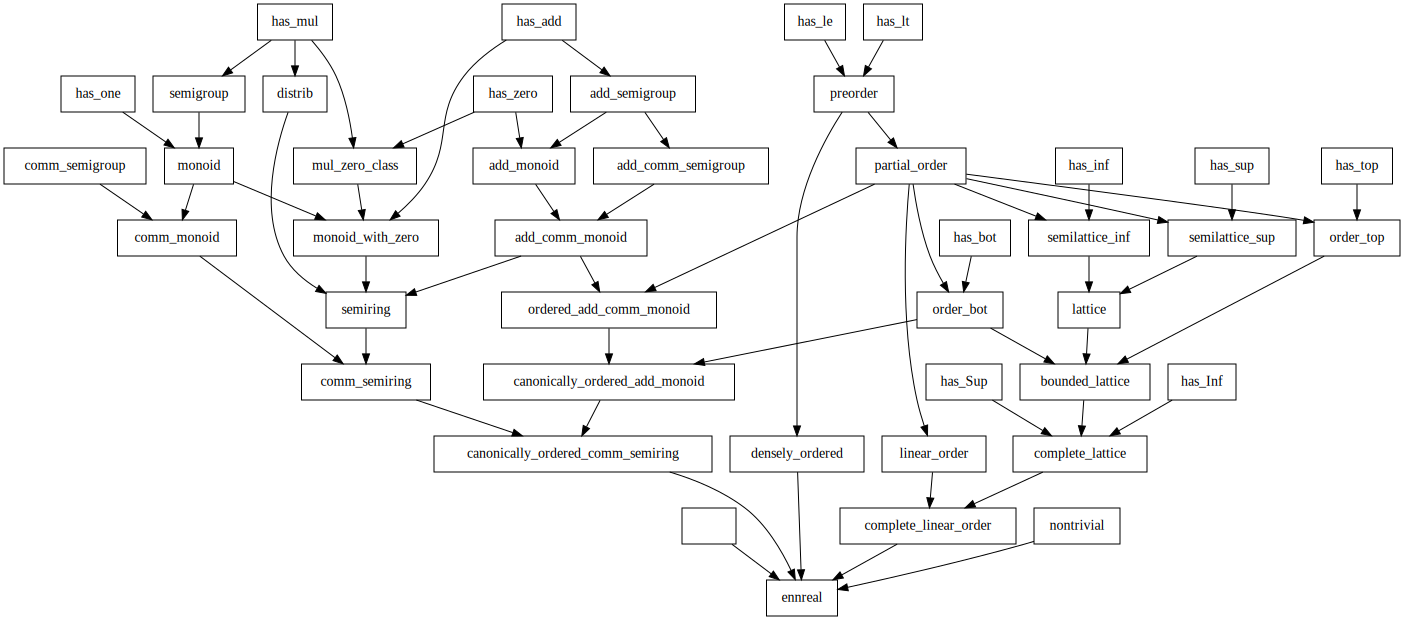

In [31]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
show(e)

## Let's make some small nontrivial instances of each of these structures, before we move on

## Back to picking apart `measure`